### 🧩 Problem Statement

In today’s globalized economy, countries vary significantly in terms of economic performance and policy direction. However, these differences are often complex and not easily grouped by geography or development status alone. This project aims to uncover hidden economic patterns across countries by applying unsupervised machine learning, specifically clustering algorithms, to a set of key economic indicators.

By analyzing metrics such as GDP growth, unemployment, inflation, interest rates, and stock index values, we seek to group countries with similar economic characteristics. These clusters will provide insight into how countries align economically, potentially identifying groups that face similar economic challenges or follow similar development paths.

This analysis will support:

    * Geopolitical and economic understanding of global trends.

    * Data-driven policy comparison between similar economies.

    * And a basis for further economic forecasting or strategy design.

### Data Cleaning

In [1]:
# Checking the last few rows of a DataFrame
import pandas as pd 
import numpy as np

df = pd.read_csv('../Clustering Countries Based on Economic Indicators Project/Data.csv')
df.tail()

,Date,Country,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value
495,2023-08-31,Japan,5.71,-3.85,4.69,8.50,5968.07
496,2023-08-31,UK,4.82,8.95,10.91,8.87,21731.52
497,2023-09-30,USA,7.32,0.61,9.36,4.58,38924.38
498,2023-10-31,Germany,8.04,-2.23,2.89,8.04,39107.07
499,2023-11-30,Australia,9.23,6.16,6.78,9.49,21072.66


In [2]:
# Checking for missing values in the DataFrame
df.isnull().sum()

Date                     0
Country                  0
Inflation Rate (%)       0
GDP Growth Rate (%)      0
Unemployment Rate (%)    0
Interest Rate (%)        0
Stock Index Value        0
dtype: int64

In [3]:
# Checking for duplicate rows in the DataFrame
df.duplicated().sum()

np.int64(0)

In [4]:
# Displaying the data types of each column in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   500 non-null    object 
 1   Country                500 non-null    object 
 2   Inflation Rate (%)     500 non-null    float64
 3   GDP Growth Rate (%)    500 non-null    float64
 4   Unemployment Rate (%)  500 non-null    float64
 5   Interest Rate (%)      500 non-null    float64
 6   Stock Index Value      500 non-null    float64
dtypes: float64(5), object(2)
memory usage: 27.5+ KB


In [5]:
# Displaying summary statistics of the DataFrame
df.describe()

,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value
count,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.08514,2.414780,6.906720,4.698180,20926.226540
std,2.95633,4.074762,2.982406,3.152877,11066.259233
min,0.00000,-5.000000,2.000000,-0.980000,1017.270000
25%,2.52500,-1.170000,4.257500,2.027500,11587.862500
50%,5.20500,2.580000,6.865000,4.975000,20996.210000
75%,7.71000,5.445000,9.502500,7.352500,30824.847500
max,9.99000,9.930000,11.970000,10.000000,39982.210000


In [6]:
# Displaying summary statistics for object type columns in the DataFrame
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Date,500,156,2018-03-31,9
Country,500,10,France,59


In [7]:
# Displaying the unique values in the 'Country' column
df['Country'].unique()

array(['Brazil', 'France', 'USA', 'Canada', 'Japan', 'Germany', 'China',
       'UK', 'India', 'Australia'], dtype=object)

In [8]:
df.select_dtypes(include=['float64']).columns

Index(['Inflation Rate (%)', 'GDP Growth Rate (%)', 'Unemployment Rate (%)',
       'Interest Rate (%)', 'Stock Index Value'],
      dtype='object')

### Exploratory Data Analysis (EDA)

In [9]:
# Generating a profiling report for the DataFrame
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:00<00:00, 732.41it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

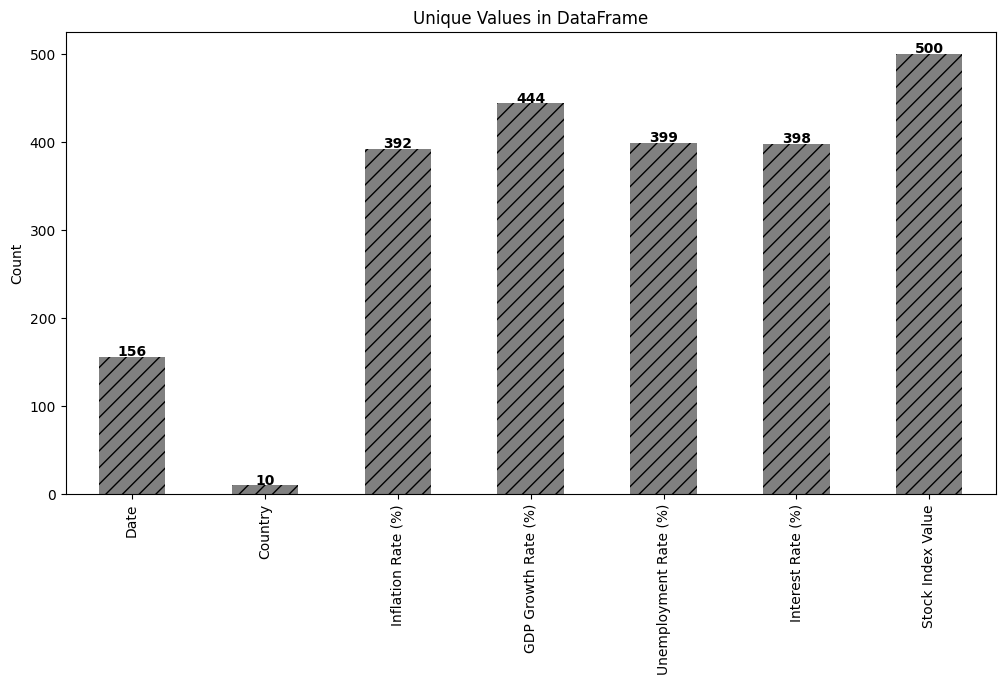

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the Unique Values
unique = df.nunique()
plt.figure(figsize=(12, 6))
unique.plot(kind='bar', color ='grey', hatch='//')
plt.title('Unique Values in DataFrame')
plt.ylabel('Count')
for i,v in enumerate(unique):
    plt.text(i, v + 1, str(v), color='black', fontweight='bold', ha='center')
plt.show()


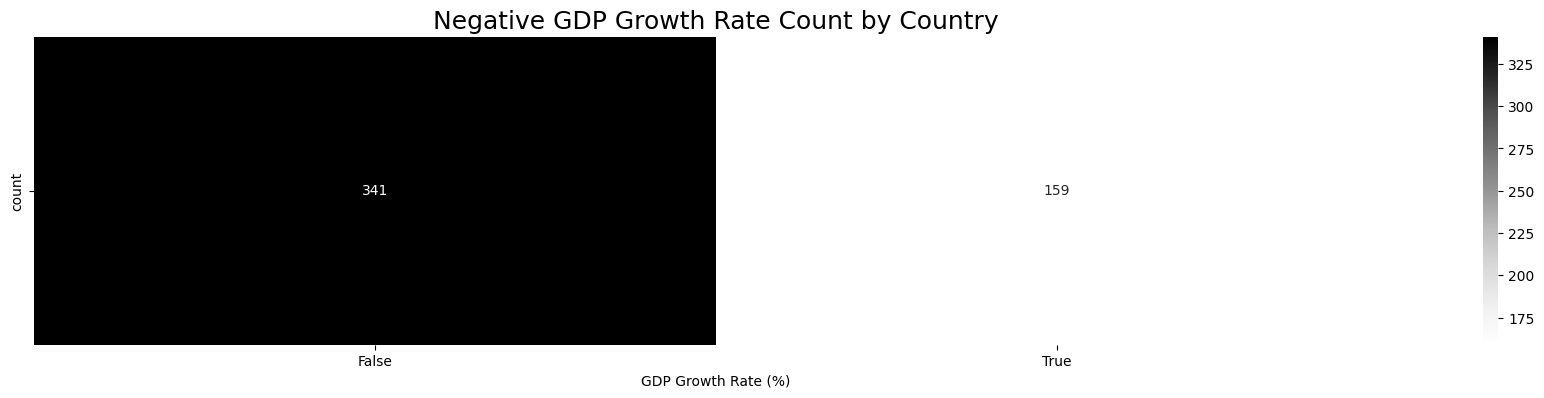

In [11]:
# Number Of Negative Values of GDP
neg_values = df['GDP Growth Rate (%)'] < 0

plt.figure(figsize=(22, 4))
sns.heatmap(pd.DataFrame(neg_values.value_counts()).T, annot=True, cmap='Greys', fmt='0.0f').set_title('Negative GDP Growth Rate Count by Country', fontsize=18)
plt.show()

In [12]:
# Getting the indices of the negative values in the 'GDP Growth Rate (%)' column
neg_indices = df.loc[neg_values].index
neg_indices

Index([  4,   8,   9,  11,  13,  16,  25,  29,  34,  35,
       ...
       465, 468, 474, 482, 489, 491, 492, 493, 495, 498],
      dtype='int64', length=159)

In [13]:
# Highlighting Negative GDP Growth Rate Values in DataFrame
def red_neg(v):
    return 'background-color: lightcoral; color: white' if v < 0 else ''

df_neg_gdp = df[df['GDP Growth Rate (%)']<0].head(25)
df_neg_gdp = df_neg_gdp.style.map(lambda v: 'background-color: lightcoral; color: white' if v<0 else '', subset=['GDP Growth Rate (%)'])
df_neg_gdp


,Date,Country,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value
4,2010-02-28,Canada,0.690000,-0.520000,11.920000,-0.510000,16413.030000
8,2010-03-31,Germany,0.050000,-4.780000,3.310000,3.850000,38146.220000
9,2010-03-31,USA,7.200000,-1.480000,4.100000,8.220000,6067.710000
11,2010-04-30,Germany,8.840000,-2.870000,4.820000,3.990000,25382.990000
13,2010-05-31,France,5.690000,-4.860000,3.610000,8.790000,12514.430000
16,2010-06-30,France,8.380000,-4.760000,6.410000,2.340000,37646.410000
25,2010-09-30,Canada,5.270000,-3.960000,3.510000,8.370000,16636.730000
29,2010-12-31,Canada,9.890000,-1.480000,4.780000,4.780000,2858.010000
34,2011-01-31,UK,5.660000,-3.450000,3.780000,3.350000,32903.040000
35,2011-01-31,USA,0.090000,-1.820000,11.920000,-0.060000,31674.370000


In [14]:
# Defining numeric and categorical columns for further analysis
numeric_cols = ['Inflation Rate (%)', 'GDP Growth Rate (%)', 'Unemployment Rate (%)',
       'Interest Rate (%)', 'Stock Index Value']
cat_columns = ['Country', 'Date']

In [15]:
# Function to plot numerical features boxplot and identify outliers
def plot_numerical_features_boxplot(data, columns_list, rows, cols, title):
    sns.set_style("darkgrid")
    fig, axs = plt.subplots(rows, cols, figsize=(15, 7), sharey=True)
    fig.suptitle(title, fontsize=16, y=1)
    axs = axs.flatten()
    outliers_df = pd.DataFrame(columns=['Column', 'Outliers_index', 'Outliers_value'])

    records = []
    for i, col in enumerate(columns_list):
        sns.boxplot(x=data[col], ax=axs[i], color='#404B69')
        axs[i].set_title(f'{col} (skewness: {data[col].skew()})', fontsize=12)

        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))
        outliers_index = data[outliers].index.tolist()
        outliers_index = data[outliers][col].tolist()
        records.append({'Column': col, 'Outliers_index':  outliers_index, 'Outliers_value': outliers_index})
        axs[i].plot([], [], 'ro', alpha=0.5, label=f'Outliers: {outliers.sum()}')
        axs[i].legend(loc='upper right', fontsize=10)
    plt.tight_layout()
    return pd.DataFrame(records)    

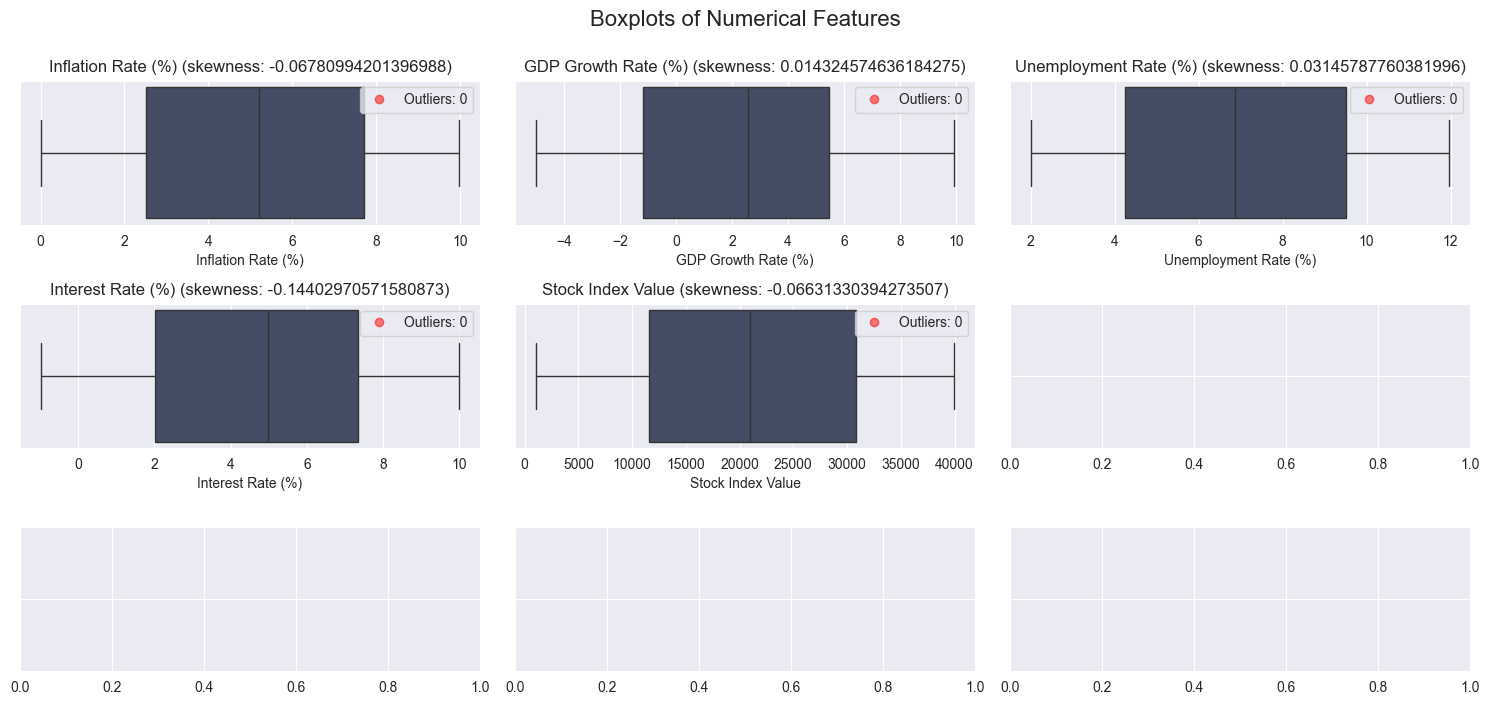

In [16]:
outliers_df = plot_numerical_features_boxplot(data=df, columns_list=numeric_cols, rows=3, cols=3, title='Boxplots of Numerical Features')

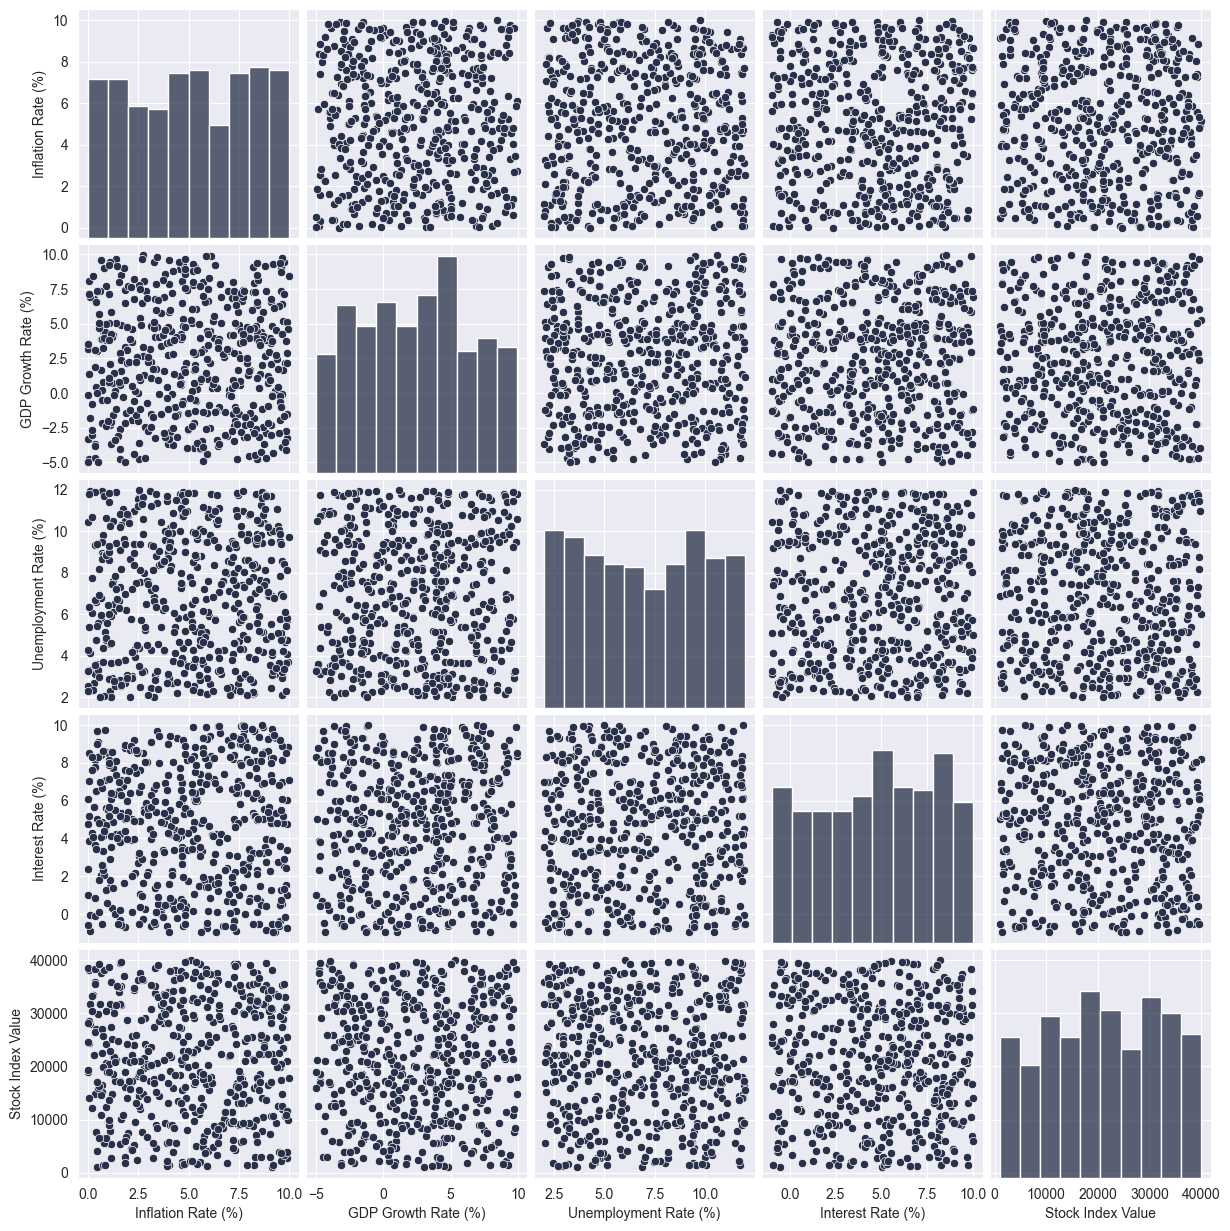

<Figure size 800x600 with 0 Axes>

In [17]:
# Pairplot for Noises
colors = ["#283149", "#404B69", "#DBEDF3"]

sns.set_style("darkgrid")
sns.set_palette(colors)
sns.pairplot(df[numeric_cols])
plt.figure(figsize=(8, 6))
plt.suptitle('Check for Noises', y=1, fontsize=25)
plt.show()

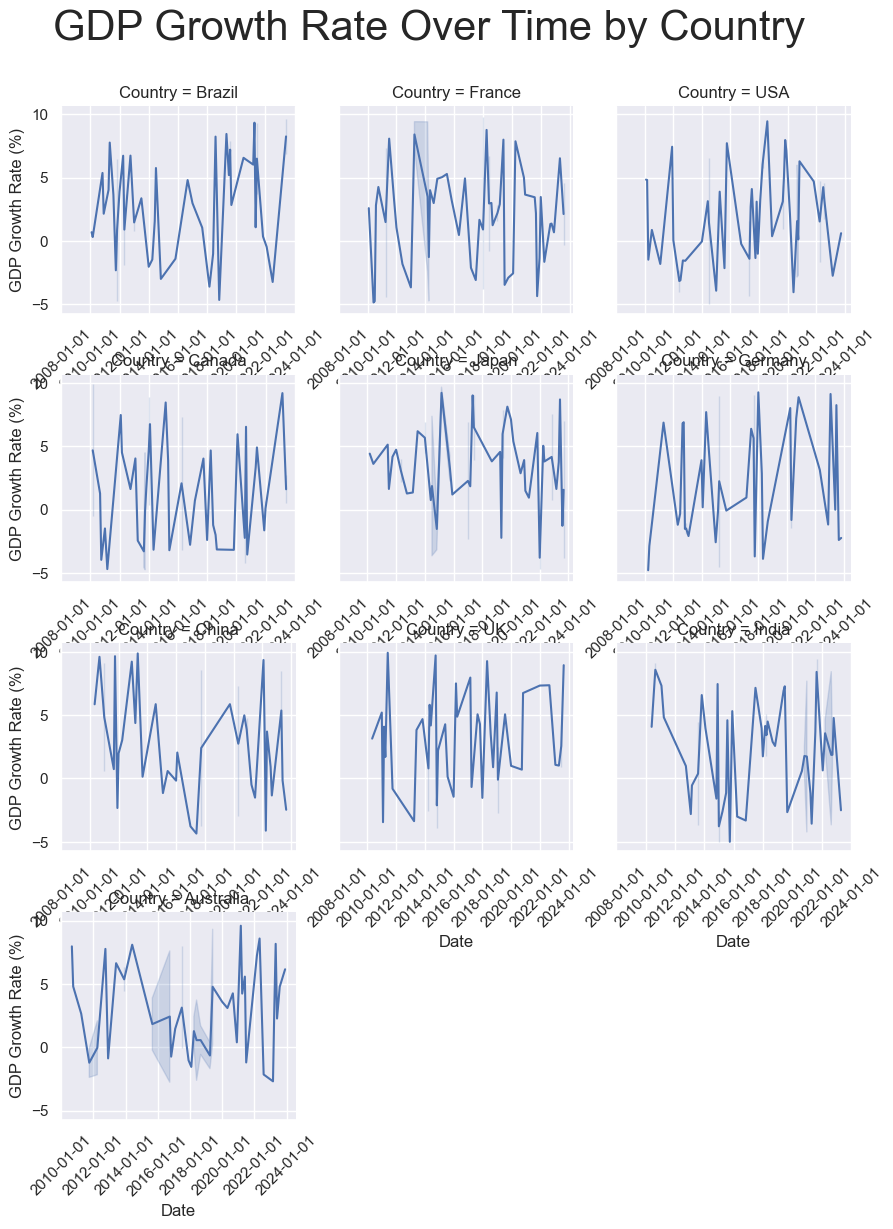

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

# Plotting GDP Growth Rate Over Time by Country
sns.set_theme(style="darkgrid")
g = sns.FacetGrid(df, col="Country", col_wrap=3, height=3, sharex=False)
g.map_dataframe(sns.lineplot, x="Date", y="GDP Growth Rate (%)")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.9)
g.figure.suptitle('GDP Growth Rate Over Time by Country', fontsize=30)
plt.show()

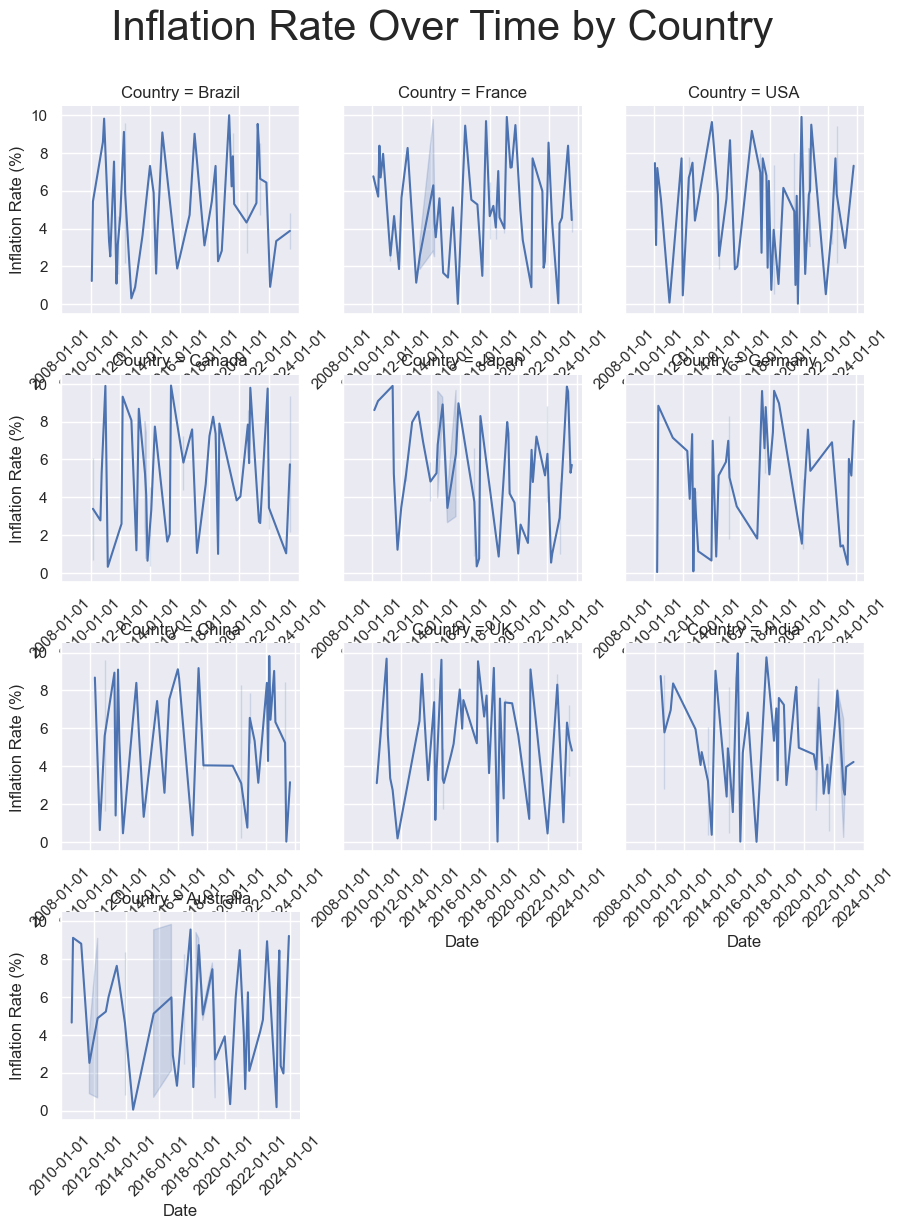

In [19]:
# Plotting Inflation Rate Over Time by Country
sns.set_theme(style="darkgrid")
g = sns.FacetGrid(df, col="Country", col_wrap=3, height=3, sharex=False)
g.map_dataframe(sns.lineplot, x="Date", y="Inflation Rate (%)")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.9)
g.figure.suptitle('Inflation Rate Over Time by Country', fontsize=30)
plt.show()

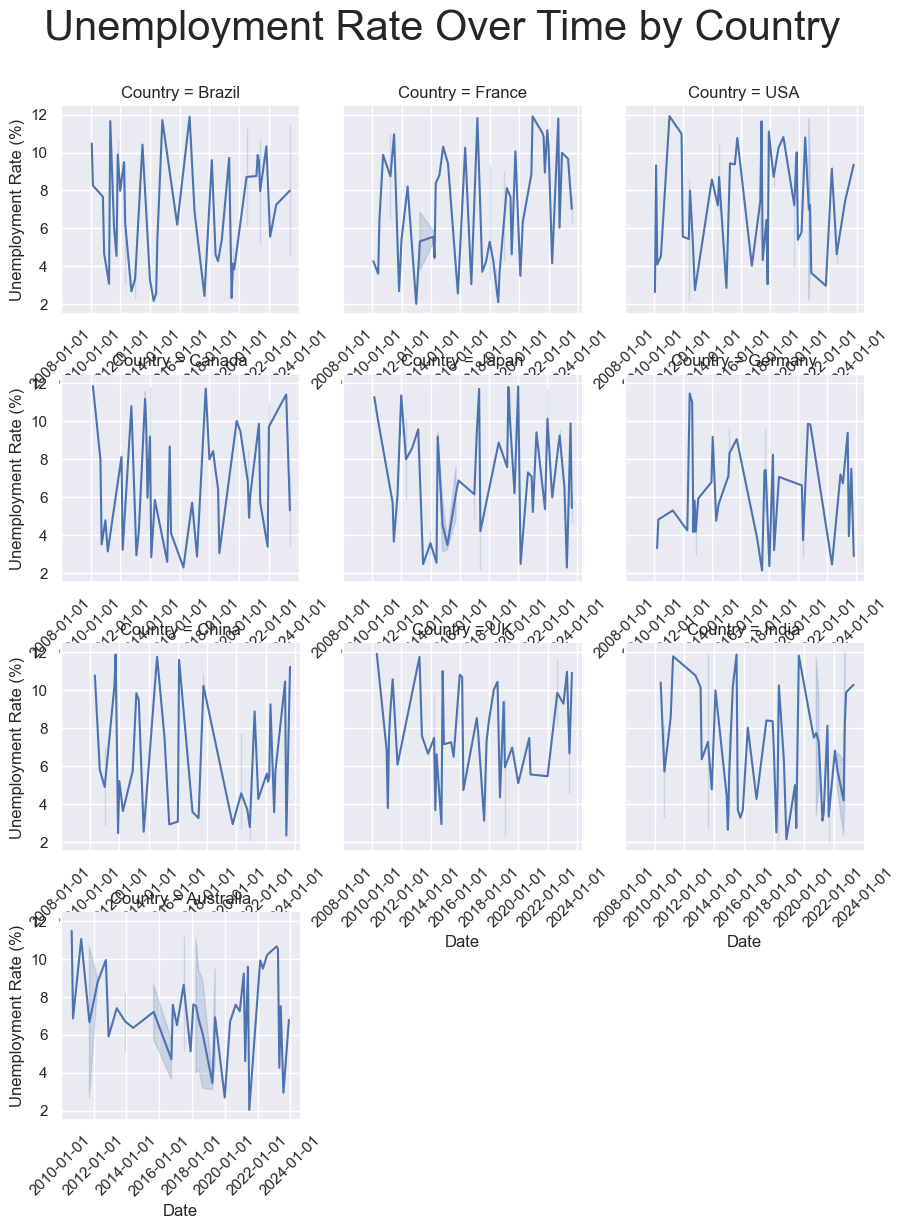

In [20]:
# Plotting Unemployment Rate Over Time by Country
sns.set_theme(style="darkgrid")
g = sns.FacetGrid(df, col="Country", col_wrap=3, height=3, sharex=False)
g.map_dataframe(sns.lineplot, x="Date", y="Unemployment Rate (%)")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.9)
g.figure.suptitle('Unemployment Rate Over Time by Country', fontsize=30)
plt.show()

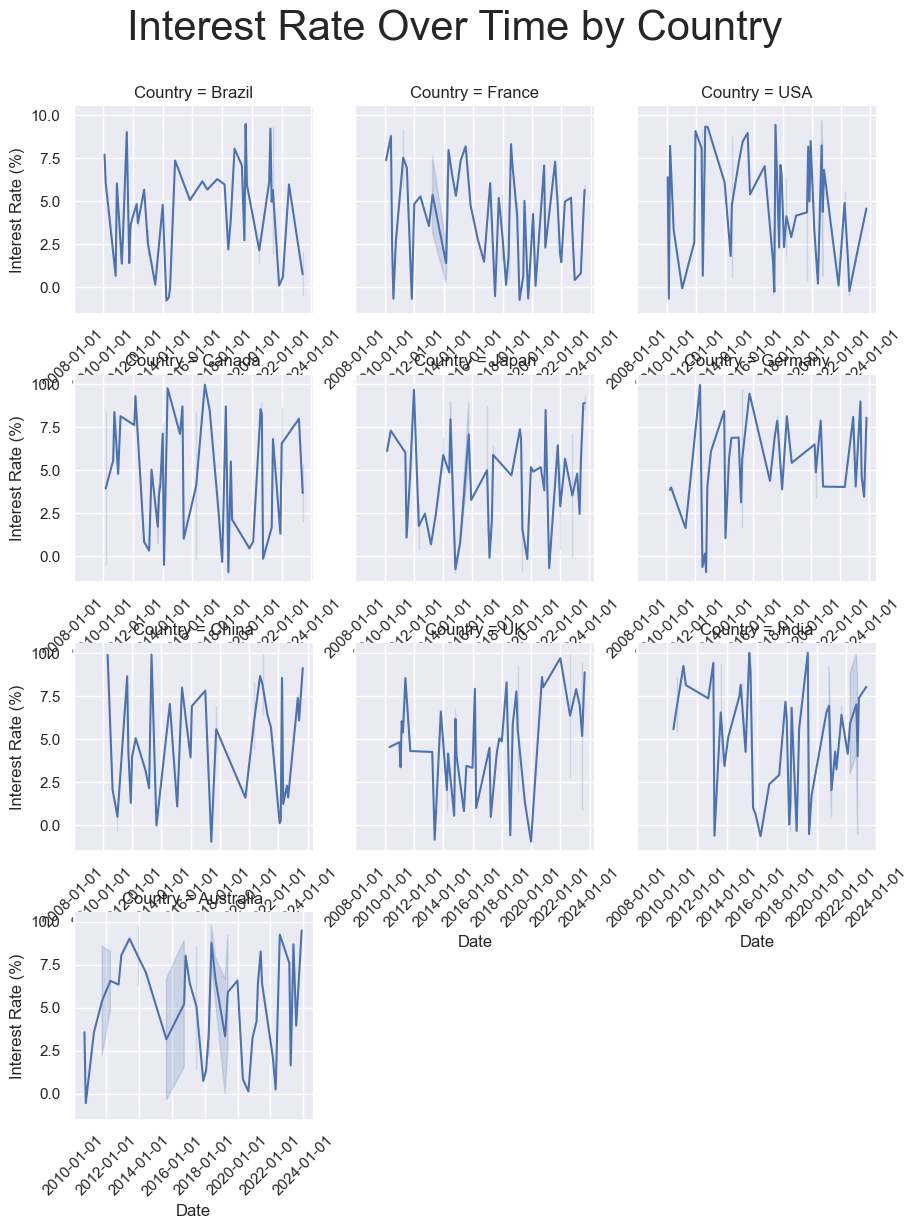

In [21]:
# Plotting Interest Rate Rate Over Time by Country
sns.set_theme(style="darkgrid")
g = sns.FacetGrid(df, col="Country", col_wrap=3, height=3, sharex=False)
g.map_dataframe(sns.lineplot, x="Date", y="Interest Rate (%)")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.9)
g.figure.suptitle('Interest Rate Over Time by Country', fontsize=30)
plt.show()

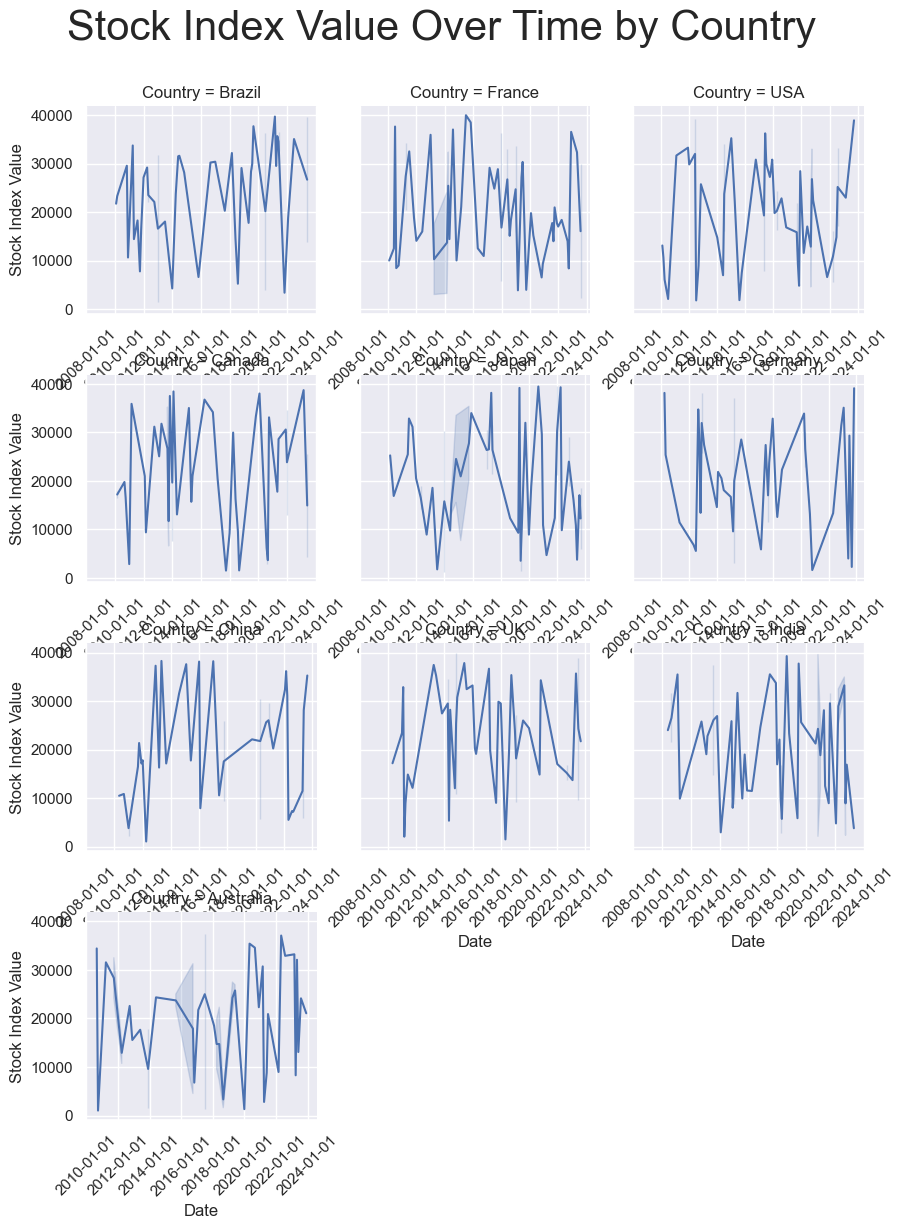

In [22]:
# Plotting Stock Index Value Over Time by Country
sns.set_theme(style="darkgrid")
g = sns.FacetGrid(df, col="Country", col_wrap=3, height=3, sharex=False)
g.map_dataframe(sns.lineplot, x="Date", y="Stock Index Value")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.9)
g.figure.suptitle('Stock Index Value Over Time by Country', fontsize=30)
plt.show()

Selected Components: 2
Explained Variance Ratio: [0.3199663  0.19435377]


C:\Users\moham\AppData\Local\Temp\ipykernel_7608\1234555713.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_result[:, 0], pca_result[:, 1], cmap='tab10', s=50)


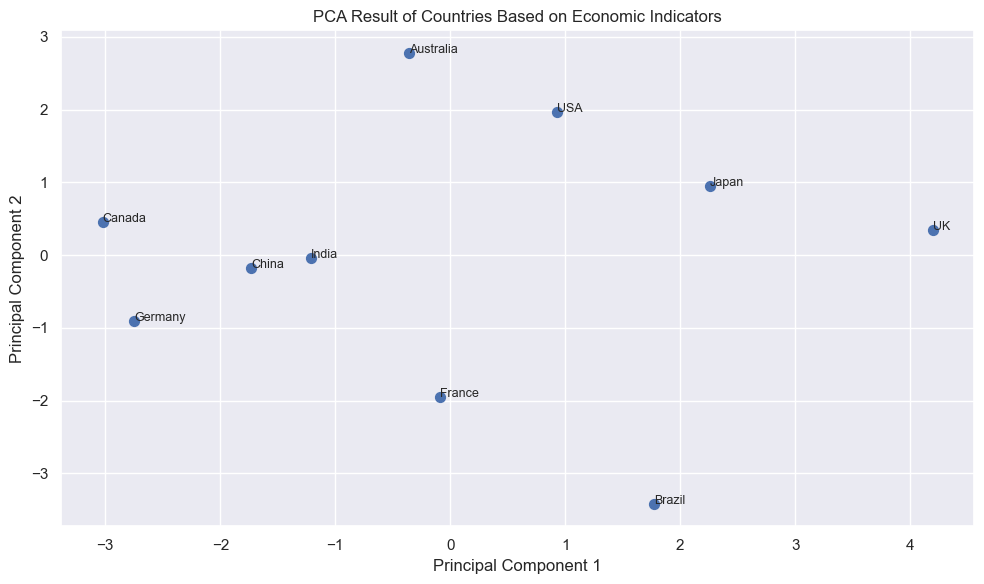

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Grouping the data by 'Country' and aggregating numeric columns
country_stats = df.groupby('Country')[numeric_cols].agg(['mean', 'median', 'std'])  
country_stats.columns = ['_'.join(col).strip() for col in country_stats.columns.values]

# Standarize the data
x_scaled = StandardScaler().fit_transform(country_stats)

# Pca (90% Variance)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_scaled)

loadings = pd.DataFrame(
    pca.components_.T[:, :2],
    index=country_stats.columns,
    columns=['PC1', 'PC2']
)

print(f'Selected Components: {pca.n_components_}')
print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')


plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Result of Countries Based on Economic Indicators')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
for i, country in enumerate(country_stats.index):
    plt.text(pca_result[i,0], pca_result[i,1], country, fontsize=9)
plt.show()

In [32]:
country_stats

,Inflation Rate (%)_mean,Inflation Rate (%)_median,Inflation Rate (%)_std,GDP Growth Rate (%)_mean,GDP Growth Rate (%)_median,GDP Growth Rate (%)_std,Unemployment Rate (%)_mean,Unemployment Rate (%)_median,Unemployment Rate (%)_std,Interest Rate (%)_mean,Interest Rate (%)_median,Interest Rate (%)_std,Stock Index Value_mean,Stock Index Value_median,Stock Index Value_std
Country,,,,,,,,,,,,,,,
Australia,5.059020,4.800,3.235904,2.736078,2.43,3.725032,7.121176,7.400,2.721344,5.208824,6.290,3.186395,19768.962745,21072.66,11216.423204
Brazil,5.040417,4.775,2.920938,2.972500,3.50,4.054468,6.819792,6.165,3.158038,4.230417,4.050,2.943893,23454.472500,26017.21,10652.188612
Canada,4.986383,4.600,3.182841,1.179787,0.50,4.324304,6.927021,6.600,3.179579,4.716383,5.020,3.542100,21596.551064,20477.84,12085.138450
China,5.221220,5.340,3.293230,2.708537,2.22,4.401931,6.332927,5.600,3.330483,4.791707,5.040,3.280017,20602.164634,20246.54,11568.953784
France,4.912373,4.660,2.598766,2.016610,2.59,4.175534,6.822881,6.410,3.027385,3.978814,4.750,2.830224,19853.330847,18330.25,10737.096771
Germany,4.902439,5.210,2.991452,2.023902,0.00,4.609101,6.177805,5.930,2.568265,5.323902,5.420,2.797121,20876.187073,22328.16,11215.700013
India,4.949821,4.840,2.841513,2.241250,2.54,4.103193,6.615179,6.525,3.214828,5.186071,5.575,3.275059,20733.116964,21796.57,11070.399889
Japan,5.412222,5.290,2.960487,3.443889,3.94,3.676124,7.036296,6.910,2.893225,4.362778,4.855,3.103746,20218.673889,18903.98,11313.858248
UK,5.390217,5.635,2.822581,3.191522,3.96,3.780504,7.711739,7.530,2.646544,4.707391,4.500,3.099403,22820.943913,23730.02,10772.800393


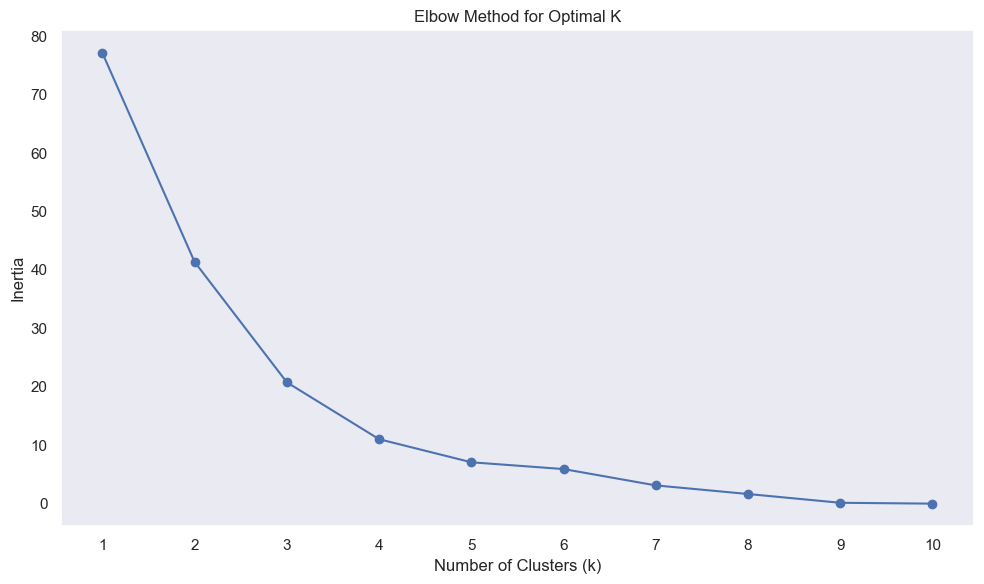

In [33]:
from sklearn.cluster import KMeans

inertias = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(pca_result)
    inertias.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11)) 
plt.grid()
plt.tight_layout()
plt.show()

In [34]:
# 1. Run KMeans on your PCA result (assuming it’s in X_pca)
k = 4  # or whatever you chose from Elbow/Silhouette
km = KMeans(n_clusters=k, random_state=42)
labels = km.fit_predict(pca_result)

# 2. Create a DataFrame mapping countries → clusters
clusters_df = pd.DataFrame({
    'Country': country_stats.index,
    'Cluster': labels
}).sort_values('Cluster')

display(clusters_df)

# 3. Group by cluster to see each country list
cluster_groups = clusters_df.groupby('Cluster')['Country'].apply(list).reset_index()
display(cluster_groups)


,Country,Cluster
3,China,0
2,Canada,0
6,India,0
5,Germany,0
7,Japan,1
0,Australia,1
9,USA,1
1,Brazil,2
4,France,2
8,UK,3


,Cluster,Country
0,0,"[China, Canada, India, Germany]"
1,1,"[Japan, Australia, USA]"
2,2,"[Brazil, France]"
3,3,[UK]


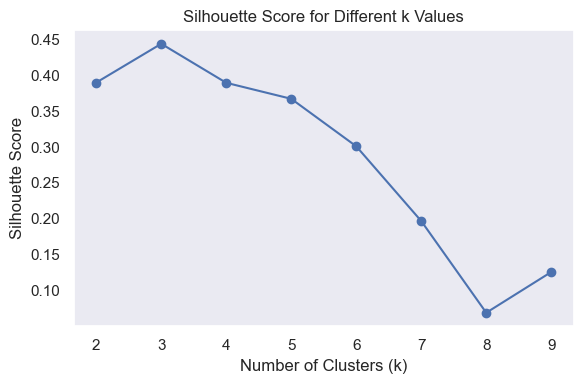

In [35]:
from sklearn.metrics import silhouette_score

sil_scores = []
ks = range(2, 10)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(pca_result)
    sil_scores.append(silhouette_score(pca_result, labels))

plt.figure(figsize=(6, 4))
plt.plot(ks, sil_scores, marker='o')
plt.title('Silhouette Score for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(ks)
plt.grid()
plt.tight_layout()
plt.show()    

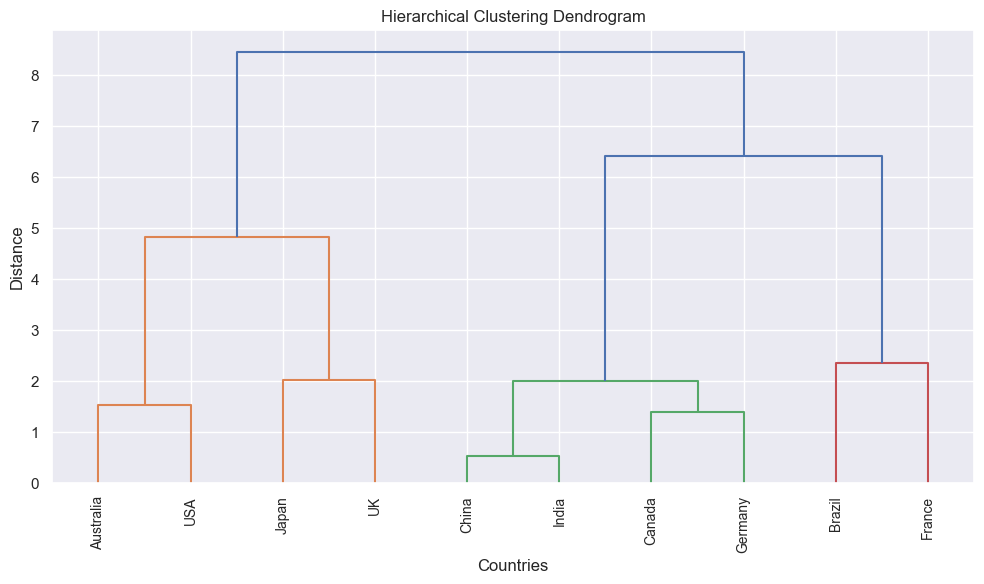

In [36]:
from scipy.cluster.hierarchy  import dendrogram, linkage

z = linkage(pca_result, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(z, labels=country_stats.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

,Country,HC_Cluster
1,Brazil,0
4,France,0
7,Japan,1
8,UK,1
5,Germany,2
3,China,2
6,India,2
2,Canada,2
0,Australia,3
9,USA,3


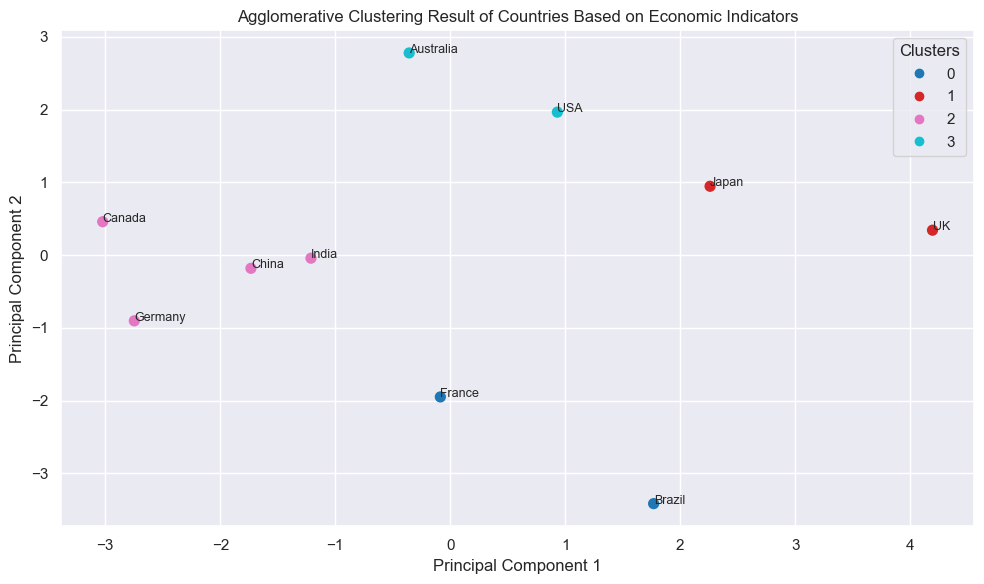

In [37]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 4  
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
hc_labels = hc.fit_predict(pca_result)

clusters_hc = pd.DataFrame({
    'Country': country_stats.index,
    'HC_Cluster': hc_labels
}).sort_values('HC_Cluster')
display(clusters_hc)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=hc_labels, cmap='tab10', s=50)
for i, country in enumerate(country_stats.index):
    plt.text(pca_result[i, 0], pca_result[i, 1], country, fontsize=9)
plt.title('Agglomerative Clustering Result of Countries Based on Economic Indicators')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.tight_layout()
plt.show()

In [39]:
country_stats['HC_cluster'] = hc_labels

# Compute the mean of each original feature within each cluster:
cluster_profiles = country_stats.groupby('HC_cluster')\
    [[
      'Inflation Rate (%)_mean',
      'GDP Growth Rate (%)_mean',
      'Unemployment Rate (%)_mean',
      'Interest Rate (%)_mean',
      'Stock Index Value_mean'
    ]].mean()

display(cluster_profiles)

,Inflation Rate (%)_mean,GDP Growth Rate (%)_mean,Unemployment Rate (%)_mean,Interest Rate (%)_mean,Stock Index Value_mean
HC_cluster,,,,,
0,4.976395,2.494555,6.821337,4.104615,21653.901674
1,5.401220,3.317705,7.374018,4.535085,21519.808901
2,5.014966,2.038369,6.513233,5.004516,20952.004934
3,5.037931,2.231373,7.215150,4.943622,19879.729530


In [49]:
hc_pca =  AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_hc = hc_pca.fit_predict(pca_result)

km4 = KMeans(n_clusters=4, random_state=42)
km4_labels = km4.fit(pca_result)

pd.DataFrame({
    'Country': country_stats.index, 
    'kMeans': km4.labels_,
    'Hierarchical': labels_hc
    })

,Country,kMeans,Hierarchical
0,Australia,1,3
1,Brazil,2,0
2,Canada,0,2
3,China,0,2
4,France,2,0
5,Germany,0,2
6,India,0,2
7,Japan,1,1
8,UK,3,1
9,USA,1,3


Silhouette Score for Hierarchical Clustering: 0.4767
n/Cluster Sizes:
0    2
1    2
2    4
3    2
Name: count, dtype: int64

Feature Profile per Cluster:
   Inflation Rate (%)_mean  GDP Growth Rate (%)_mean  \
0                     4.98                      2.49   
1                     5.40                      3.32   
2                     5.01                      2.04   
3                     5.04                      2.23   

   Unemployment Rate (%)_mean  Interest Rate (%)_mean  Stock Index Value_mean  
0                        6.82                    4.10                21653.90  
1                        7.37                    4.54                21519.81  
2                        6.51                    5.00                20952.00  
3                        7.22                    4.94                19879.73  


<Figure size 1200x600 with 0 Axes>

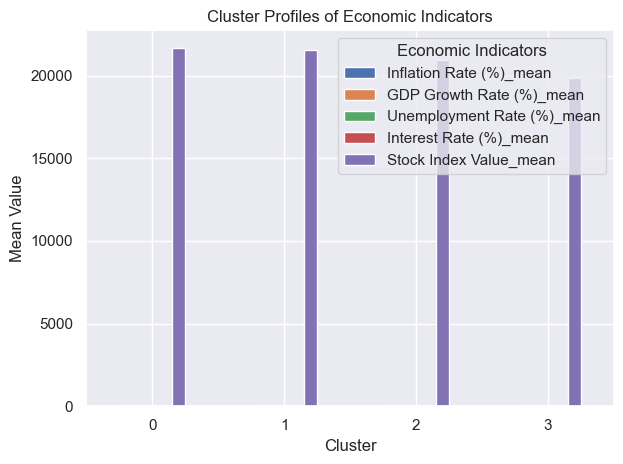

In [51]:
# Evaluating Hierarchical Clustering with Silhouette Score
silhouette_hc = silhouette_score(pca_result, hc_labels)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hc:.4f}')

# Cluster Sizes
cluster_counts = pd.Series(hc_labels).value_counts().sort_index()
print("n/Cluster Sizes:")
print(cluster_counts)

# Feature Profile per Cluster
feature_profile = country_stats.groupby(hc_labels)[
    ['Inflation Rate (%)_mean',
     'GDP Growth Rate (%)_mean',
     'Unemployment Rate (%)_mean',
     'Interest Rate (%)_mean',
     'Stock Index Value_mean']
].mean().round(2)
print("\nFeature Profile per Cluster:")
print(feature_profile)

# Visualizing Cluster Profiles
plt.figure(figsize=(12, 6))
feature_profile.plot(kind='bar', rot=0)
plt.title('Cluster Profiles of Economic Indicators')
plt.ylabel('Mean Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.legend(title='Economic Indicators')
plt.tight_layout()
plt.show()
